In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from sklearn.linear_model import LogisticRegression

In [2]:
with open('../../bases/census.pkl', 'rb') as f:
    X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [3]:
X_census_treinamento.shape, Y_census_treinamento.shape

((27676, 108), (27676,))

In [4]:
X_census_teste.shape, Y_census_teste.shape

((4885, 108), (4885,))

In [5]:
logistic_census = LogisticRegression(random_state = 1)

In [6]:
logistic_census.fit(X_census_treinamento, Y_census_treinamento)

LogisticRegression(random_state=1)

In [7]:
logistic_census.intercept_, logistic_census.coef_

(array([-2.10474165]),
 array([[-6.94469649e-02,  1.18679159e-01, -9.04524758e-03,
         -7.81357460e-02,  5.76691457e-02,  5.08994420e-02,
         -8.82856549e-02, -5.01462809e-02, -1.42900810e-01,
         -1.04784027e-01, -1.19233556e-01, -3.77074867e-02,
         -2.08124820e-02, -2.93974652e-02, -8.45705964e-02,
         -8.08920718e-02, -8.16248852e-03,  1.09035256e-02,
          1.46893853e-01,  1.20194939e-01, -7.84325002e-02,
          1.45553932e-01, -4.75278833e-01,  1.14436730e-01,
          2.27948173e-02, -1.93347518e-01,  4.38094226e-02,
          7.07825942e-01, -6.57034078e-02, -5.23341515e-01,
         -1.09247966e-01, -8.94357349e-02, -7.42801130e-02,
         -1.40912231e-02, -2.06468670e-02,  2.21547856e-02,
          2.51784840e-01, -1.68183468e-01, -1.43046856e-01,
         -8.47285978e-02, -2.55735605e-01, -2.68986405e-01,
          1.61655356e-01,  8.57817041e-02,  8.33259769e-02,
          1.08967512e-01, -2.56717036e-02, -2.99250091e-02,
          1.37854

In [8]:
previsoes = logistic_census.predict(X_census_teste)

In [9]:
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [10]:
Y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
accuracy_score(Y_census_teste, previsoes)

0.849539406345957

In [14]:
confusion_matrix(Y_census_teste, previsoes)

array([[423,  13],
       [ 14,  50]], dtype=int64)

In [14]:
print(classification_report(Y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885



In [16]:
from yellowbrick.classifier import ConfusionMatrix

0.849539406345957

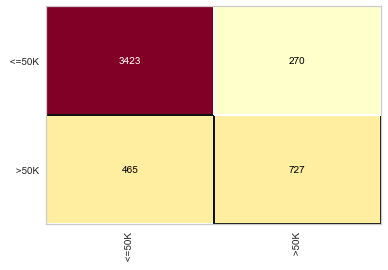

In [17]:
cm = ConfusionMatrix(logistic_census)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste)